# QAQC order and single function testing

## Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Import QAQC libraries

In [2]:
import os
import tempfile
import argparse 

# Import all qaqc script functions
try:
    from qaqc_plot import *
    from qaqc_utils import *
    from qaqc_wholestation import *
    from qaqc_logic_checks import *
    from qaqc_buoy_check import *
    from qaqc_frequent import *
    from qaqc_unusual_gaps import *
    from qaqc_unusual_large_jumps import *
    from qaqc_climatological_outlier import *
    from qaqc_unusual_streaks import *
except Exception as e:
    print("Error importing qaqc script: {}".format(e))

# Import qaqc stage calc functions
try:
    from QAQC_pipeline import *
except:
    print("Error importing QAQC_pipeline.py")
    
if not os.path.exists("./qaqc_figs"):
    os.makedirs("./qaqc_figs")

## Testing on a single network / station

### Load file and convert to pandas df 

In [3]:
""" Aqaqc_world_recordtions from QAQC libraries can be used here.
    For the qaqc pipeline, we need the pandas df in the same format used in it
"""

network = "VCAPCD"
rawdir, cleandir, qaqcdir, mergedir = get_file_paths(network)
print(rawdir)
print(cleandir)
print(qaqcdir)
print(mergedir)

1_raw_wx/VCAPCD/
2_clean_wx/VCAPCD/
3_qaqc_wx/VCAPCD/
4_merge_wx/VCAPCD/


In [4]:
""" We can test in the same way that the pipeline, 
    take a network and subsample an station
"""

files, stations = read_network_files(network, cleandir)
stations_sample = stations.sample(1)
station = stations_sample.iloc[0]
print(station)

VCAPCD_TO


In [5]:
""" We could load station files from the 
    s3 bucket
"""
file_name = cleandir + station + ".nc"
fs = s3fs.S3FileSystem()
aws_url = "s3://wecc-historical-wx/"+file_name

with fs.open(aws_url) as fileObj:
    t0 = time.time()
    ds = xr.open_dataset(fileObj).load()
    ds = ds.drop_duplicates(dim="time")


KeyboardInterrupt



In [ ]:
ds

In [6]:
""" Or we can test on a locally stored station 
    file directly
"""
ds = xr.open_dataset('Train_Files/LOXWFO_OX1MB.nc')
ds

<xarray.Dataset>
Dimensions:         (station: 1, time: 247300)
Coordinates:
  * time            (time) datetime64[ns] 2006-05-08T19:45:00 ... 2022-08-31T...
  * station         (station) object 'LOXWFO_OX1MB'
    lat             (station, time) float64 ...
    lon             (station, time) float64 ...
Data variables: (12/13)
    ps              (station, time) float64 ...
    tas             (station, time) float64 ...
    pr              (station, time) float64 ...
    hurs            (station, time) float64 ...
    sfcWind         (station, time) float64 ...
    sfcWind_dir     (station, time) float64 ...
    ...              ...
    hurs_qc         (station, time) object ...
    sfcWind_qc      (station, time) object ...
    sfcWind_dir_qc  (station, time) object ...
    pr_qc           (station, time) object ...
    tdps_derived    (station, time) float64 ...
    elevation       (station, time) float64 ...
Attributes: (12/13)
    title:                  LOXWFO cleaned
    institution:            Eagle Rock Analytics / Cal Adapt
    source:                 
    history:                MADIS_clean.py script run on 01-31-2023, 22:05:43...
    comment:                Intermediate data product: may not have been subj...
    license:                
    ...                     ...
    disclaimer:             This document was prepared as a result of work sp...
    station_name:           Morro Bay Harbor
    raw_files_merged:       1
    anemometer_height_m:    nan
    thermometer_height_m:   nan
    barometer_elevation_m:  nan

In [7]:
""" Then, the idea is to convert to pandas df in the 
    format needed for the qaqc pipeline
"""
df, MultiIndex, attrs, var_attrs = qaqc_ds_to_df(ds)
df.head(5)

,time,ps,tas,pr,hurs,sfcWind,sfcWind_dir,tas_qc,hurs_qc,sfcWind_qc,...,tas_eraqc,pr_eraqc,hurs_eraqc,sfcWind_eraqc,sfcWind_dir_eraqc,tdps_derived_eraqc,elevation_eraqc,anemometer_height_m,thermometer_height_m,station
0,2006-05-08 19:45:00,NaN,285.93,NaN,68.92,3.60,290.0,nan,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOXWFO_OX1MB
1,2006-05-08 20:45:00,NaN,285.93,NaN,NaN,4.12,300.0,nan,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOXWFO_OX1MB
2,2006-05-08 21:45:00,NaN,285.93,NaN,NaN,5.66,300.0,nan,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOXWFO_OX1MB
3,2006-05-08 23:45:00,NaN,286.48,NaN,NaN,7.20,300.0,nan,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOXWFO_OX1MB
4,2006-05-09 00:45:00,NaN,285.93,NaN,66.34,6.69,300.0,nan,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOXWFO_OX1MB


### Test QAQC pipeline of single functions

After converting to df in the same format than the pipeline, we could test the whole pipeline, or single functions

#### Testing single functions

In [8]:
new_df = df.copy()

In [11]:
new_df = qaqc_world_record(new_df)

NameError: name 'log_file' is not defined

In [10]:
new_df = qaqc_elev_range(new_df)

NameError: name 'log_file' is not defined

In [ ]:
new_df = qaqc_unusual_repeated_streaks(new_df, plot=True, local=True, verbose=True)

In [ ]:
new_df = qaqc_climatological_outlier(new_df, plot=True, verbose=True)

#### Testing the whole pipeline

In [13]:
# Set up error handling.
errors, end_api, timestamp = setup_error_handling()

In [14]:
df, attrs, var_attrs = run_qaqc_pipeline(ds, network, file_name, errors, 
                                         station, end_api, rad_scheme="remove_zeros",
                                         verbose=True, local=True)

Updating missing values for: ps
Updating missing values for: tas
Updating missing values for: pr
Updating missing values for: hurs
Updating missing values for: sfcWind
Updating missing values for: sfcWind_dir
Updating missing values for: tdps_derived
pass qaqc_missing_vals
pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [6.096]
Elevation eraqc values pre-infilling: [nan]
Elevation values post-infilling/correcting: [6.096]
Elevation qaqc values post-infilling/correcting: [nan]
pass qaqc_elev_range
Thermometer height is missing -- air temperature will be excluded from all QA/QC checks
pass qaqc_sensor_height_t
Anemometer height is missing -- wind speed and direction will be excluded from all QA/QC checks
pass qaqc_sensor_height_w
pass qaqc_world_record
tdps_derived eraqc flags (any other value than nan is an active flag!): [nan 11.]
pass qaqc_crossvar_logic_tdps_to_tas_supersat
pass qaqc_crossvar_logic_tdps_to_tas_wetbulb
Precip range:  0.0 - 16620.744
Prec

NameError: name 'attrs' is not defined

In [ ]:
### Or we can always run the same way that the ALL_NETWORKS_qaqc.py does:
# whole_station_qaqc(network, cleandir, qaqcdir, rad_scheme="remove_zeros", 
#                    verbose=True, local=True)

In [3]:
""" Aqaqc_world_recordtions from QAQC libraries can be used here.
    For the qaqc pipeline, we need the pandas df in the same format used in it
"""

network = "ASOSAWOS"
rawdir, cleandir, qaqcdir, mergedir = get_file_paths(network)
print(rawdir)
print(cleandir)
print(qaqcdir)
print(mergedir)

1_raw_wx/ASOSAWOS/
2_clean_wx/ASOSAWOS/
3_qaqc_wx/ASOSAWOS/
4_merge_wx/ASOSAWOS/


In [4]:
""" We can test in the same way that the pipeline, 
    take a network and subsample an station
"""

files, stations = read_network_files(network, cleandir)
stations_sample = stations.sample(1)
station = stations_sample.iloc[0]
print(station)

ASOSAWOS_72372123184


- ASOSAWOS_74718503144
- ASOSAWOS_74917900392 

In [9]:
""" Or we can test on a locally stored station 
    file directly
"""
ds = xr.open_dataset('Train_Files/ASOSAWOS_74718503144.nc')
ds

<xarray.Dataset>
Dimensions:          (station: 1, time: 155803)
Coordinates:
  * time             (time) datetime64[ns] 2006-01-01T00:53:00 ... 2022-08-31...
    lat              (station, time) float64 ...
    lon              (station, time) float64 ...
  * station          (station) object 'ASOSAWOS_74718503144'
Data variables: (12/21)
    ps               (station, time) float64 ...
    tas              (station, time) float64 ...
    tdps             (station, time) float64 ...
    pr               (station, time) float64 ...
    sfcWind          (station, time) float64 ...
    sfcWind_dir      (station, time) float64 ...
    ...               ...
    pr_qc            (station, time) object ...
    pr_duration      (station, time) timedelta64[ns] ...
    pr_depth_qc      (station, time) float64 ...
    sfcWind_qc       (station, time) object ...
    sfcWind_method   (station, time) object ...
    sfcWind_dir_qc   (station, time) object ...
Attributes: (12/19)
    title:                 ASOS/AWOS cleaned
    institution:           Eagle Rock Analytics / Cal Adapt
    source:                
    history:               ASOSAWOS_clean.py script run on 02-06-2023, 23:43:...
    comment:               Intermediate data product: may not have been subje...
    license:               
    ...                    ...
    GHCN-DailyID:          USW00003144
    Networks:              ASOS
    thermometer_height_m:  nan
    anemometer_height_m:   10.06
    barometer_elev_m:      -14.63
    raw_files_merged:      17

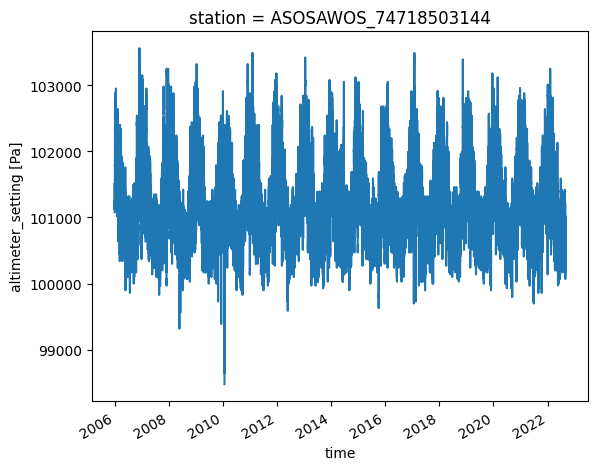

In [16]:
ds.ps_altimeter.plot()

In [10]:
""" Then, the idea is to convert to pandas df in the 
    format needed for the qaqc pipeline
"""
df, MultiIndex, attrs, var_attrs = qaqc_ds_to_df(ds)
df.head(5)

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


,time,ps,tas,tdps,pr,sfcWind,sfcWind_dir,elevation,qaqc_process,ps_qc,...,pr_eraqc,sfcWind_eraqc,sfcWind_dir_eraqc,elevation_eraqc,ps_altimeter_eraqc,psl_eraqc,pr_duration_eraqc,anemometer_height_m,thermometer_height_m,station
0,2006-01-01 00:53:00,101280.0,292.55,279.85,0.0,10.8,240.0,-16.0,V020,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,10.06,NaN,ASOSAWOS_74718503144
1,2006-01-01 01:53:00,101310.0,292.05,281.45,0.0,4.1,270.0,-16.0,V020,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,10.06,NaN,ASOSAWOS_74718503144
2,2006-01-01 02:53:00,101380.0,291.45,281.45,0.0,8.8,260.0,-16.0,V020,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,10.06,NaN,ASOSAWOS_74718503144
3,2006-01-01 03:53:00,101340.0,290.35,281.45,0.0,7.7,250.0,-16.0,V020,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,10.06,NaN,ASOSAWOS_74718503144
4,2006-01-01 04:53:00,101410.0,290.35,280.95,0.0,4.1,290.0,-16.0,V020,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,10.06,NaN,ASOSAWOS_74718503144


In [18]:
new_df = qaqc_unusual_large_jumps(df, plot=True, local=True, verbose=True)

Running qaqc_unusual_large_jumps on ['tas', 'tdps', 'ps', 'psl', 'ps_altimeter']
Running unusual large jumps check on: tas
Running unusual large jumps check on: tdps
Running unusual large jumps check on: ps
Running unusual large jumps check on: psl
Running unusual large jumps check on: ps_altimeter


In [12]:
new_df = qaqc_unusual_repeated_streaks(df, plot=True, local=True, verbose=True)

tas
tdps
ps
psl
sfcWind
Running qaqc_unusual_repeated_streaks on ['tas', 'tdps', 'ps', 'psl', 'sfcWind']


Running qaqc_unusual_large_jumps on ['tas', 'tdps', 'ps', 'psl', 'ps_altimeter']
Running unusual large jumps check on: tas
Running unusual large jumps check on: tdps
Running unusual large jumps check on: ps
Running unusual large jumps check on: psl
Running unusual large jumps check on: ps_altimeter
qaqc_unusual_large_jumps failed with Exception: 'ps_altimeter'


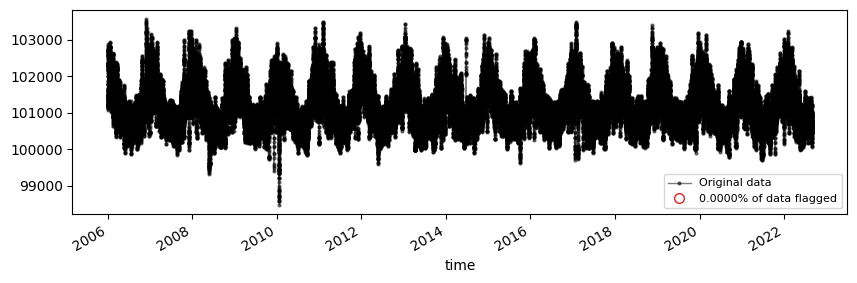

In [13]:
new_df = qaqc_unusual_large_jumps(new_df, plot=True, local=True, verbose=True)